In [2]:
import os
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

# Visulaize images

## Visualize 1 image

In [28]:
data_path = r"C:\Users\Phuc\Downloads\CS331-lab\lab01\notebooks\data"
subdirs = ['train', 'test', 'val']
categories = ['black', 'no_black']

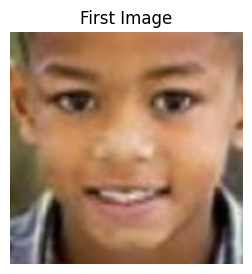

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

def load_images_from_folder(folder_path, num_images=1):
    """Loads the first image from subdirectories."""
    images = []
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if not os.path.exists(category_path):
            continue
        for file in os.listdir(category_path):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(category_path, file)
                img = cv2.imread(file_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                return images  # Return after first image is found
    return images

# Load first image from train set
demo_images = load_images_from_folder(os.path.join(data_path, 'train'))

# Display first image
if demo_images:
    plt.figure(figsize=(3, 4))
    plt.imshow(demo_images[0])
    plt.axis('off')
    plt.title("First Image")
    plt.show()
else:
    print("No images found.")


## Visualize many images

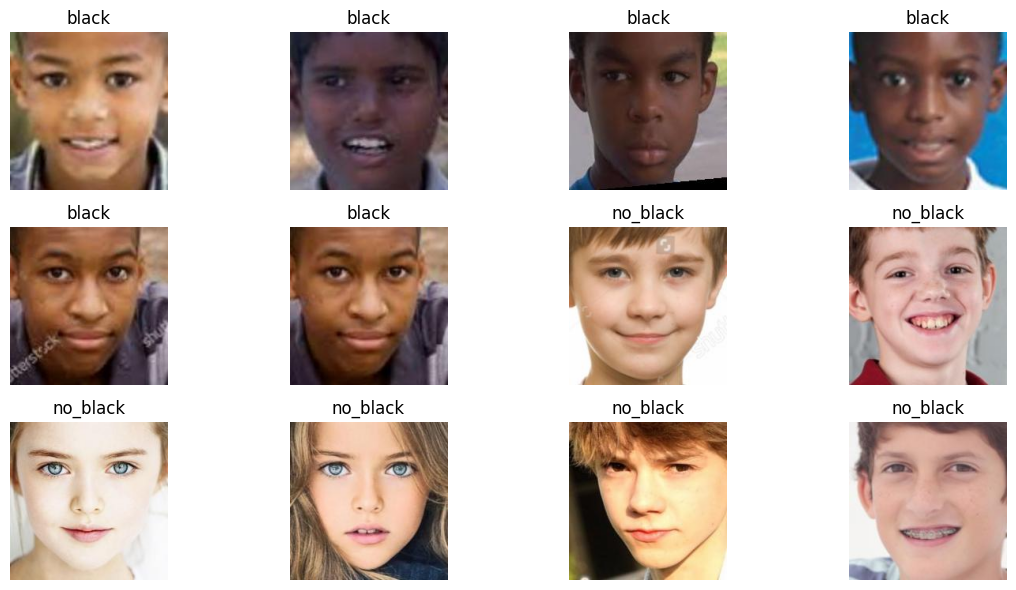

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder_path, num_images_per_category=6):
    images = []
    
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if not os.path.exists(category_path):
            continue
        count = 0
        for file in os.listdir(category_path):
            if file.endswith(('.png', '.jpg', '.jpeg')) and count < num_images_per_category:
                file_path = os.path.join(category_path, file)
                img = cv2.imread(file_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append((img, category))  # Store image with its category
                count += 1
            
            if count >= num_images_per_category:
                break  # Stop after collecting enough images from this category
    
    return images

# Load 6 images from each category (total 12 images)
demo_images = load_images_from_folder(os.path.join(data_path, 'train'), num_images_per_category=6)

# Display images
plt.figure(figsize=(12, 6))
for i, (img, category) in enumerate(demo_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)

plt.tight_layout()
plt.show()


# Dataset statistics

## Image count

In [ ]:
import os
import pandas as pd

class_stat = {}
data_len = {}
class_info = []


for mode in ['train', 'val', 'test']:
    category_count = {category: 0 for category in categories}
    
    for category in categories:
        path = os.path.join(data_path, mode, category)
        if os.path.exists(path):
            category_count[category] = len(os.listdir(path))
    
    data_len[mode] = sum(category_count.values())
    class_stat[mode] = category_count
    
    class_info.append({'Mode': mode, **category_count, 'Total_Files': data_len[mode]})

# Create DataFrame to compare file counts in 'black' and 'no_black' folders across datasets
dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df


,Mode,black,no_black,Total_Files
0,train,140,140,280
1,val,30,30,60
2,test,30,30,60


## Image sizes

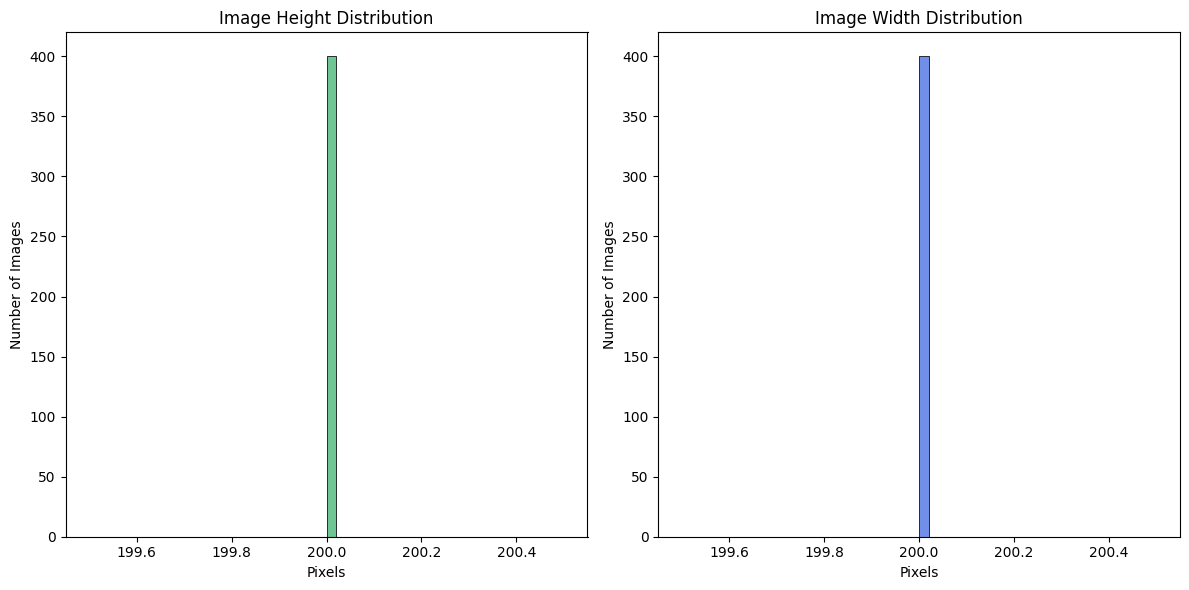

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd

# Collect image sizes
image_sizes = []

for mode in subdirs:
    for category in categories:
        image_folder = os.path.join(data_path, mode, category)
        if os.path.exists(image_folder):
            for file in os.listdir(image_folder):
                image_path = os.path.join(image_folder, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    image_sizes.append({'Width': width, 'Height': height})

# Convert to DataFrame
image_sizes_df = pd.DataFrame(image_sizes)

# Plotting weight and height as 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Height distribution
sns.histplot(image_sizes_df['Height'], bins=50, kde=False, color='mediumseagreen', ax=axes[0])
axes[0].set_title('Image Height Distribution')
axes[0].set_xlabel('Pixels')
axes[0].set_ylabel('Number of Images')

# Width distribution
sns.histplot(image_sizes_df['Width'], bins=50, kde=False, color='royalblue', ax=axes[1])
axes[1].set_title('Image Width Distribution')
axes[1].set_xlabel('Pixels')
axes[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()


# Image similarity

## Similarity of first 12 images

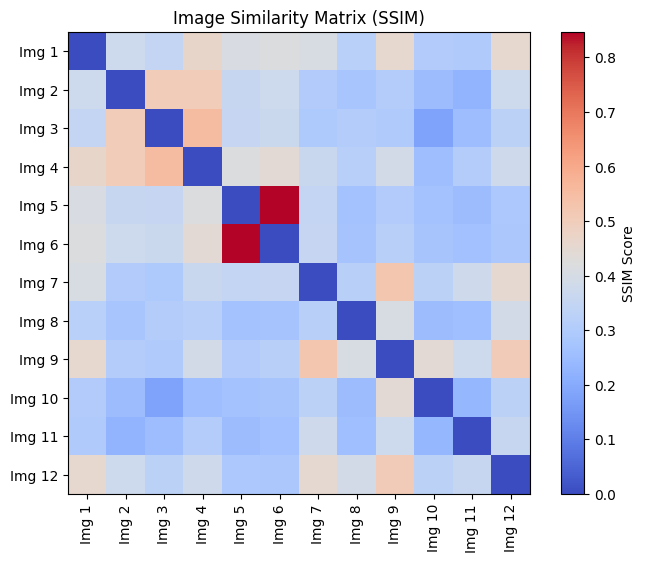

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def load_images_from_folder(folder_path, num_images_per_category=6):
    """Loads images evenly from 'black' and 'no_black' subdirectories."""
    images = []
    
    for category in categories:
        category_path = os.path.join(folder_path, category)
        if not os.path.exists(category_path):
            continue
        
        count = 0
        for file in os.listdir(category_path):
            if file.endswith(('.png', '.jpg', '.jpeg')) and count < num_images_per_category:
                file_path = os.path.join(category_path, file)
                img = cv2.imread(file_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append((img, category))  # Store image with its category
                count += 1
            
            if count >= num_images_per_category:
                break  # Stop after collecting enough images from this category
    
    return images

# Load 6 images from each category (total 12 images)
demo_images = load_images_from_folder(os.path.join(data_path, 'train'), num_images_per_category=6)

# Convert images to grayscale for SSIM calculation
gray_images = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img, _ in demo_images]

# Compute SSIM similarity matrix
num_images = len(gray_images)
similarity_matrix = np.zeros((num_images, num_images))

for i in range(num_images):
    for j in range(i + 1, num_images):
        score, _ = ssim(gray_images[i], gray_images[j], full=True)
        similarity_matrix[i, j] = score
        similarity_matrix[j, i] = score  # Symmetric matrix

# Plot similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='SSIM Score')
plt.xticks(range(num_images), [f"Img {i+1}" for i in range(num_images)], rotation=90)
plt.yticks(range(num_images), [f"Img {i+1}" for i in range(num_images)])
plt.title("Image Similarity Matrix (SSIM)")
plt.show()


## Similarity of all images

In [38]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Lấy danh sách tất cả ảnh trong dataset
image_paths = []
for subdir in ['train', 'test', 'val']:
    for category in ['black', 'no_black']:
        folder = os.path.join(data_path, subdir, category)
        if os.path.exists(folder):
            image_paths.extend([os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Đọc và resize tất cả ảnh về cùng kích thước
images = []
for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Chuyển ảnh về grayscale
    images.append(img)

# Tính SSIM giữa từng cặp ảnh
similar_count = 0
threshold = 0.8  # Ngưỡng để xác định ảnh giống nhau

for i in range(len(images)):
    for j in range(i + 1, len(images)):  # Không cần so sánh 2 lần
        score, _ = ssim(images[i], images[j], full=True)
        if score > threshold:
            similar_count += 1

print(f"Số lượng cặp ảnh có độ tương đồng cao (SSIM > {threshold}): {similar_count}")


Số lượng cặp ảnh có độ tương đồng cao (SSIM > 0.8): 2


# Data Augmentation

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

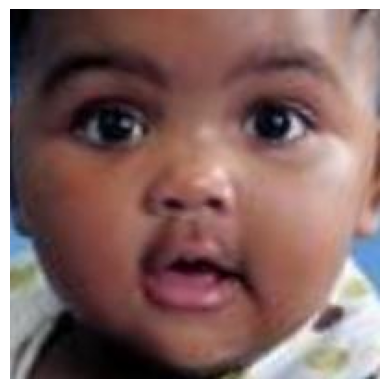

In [18]:
import cv2
import matplotlib.pyplot as plt
path = "../data/train/black/1_1_1_20161219205055053.jpg.chip.jpg"
img = cv2.imread(path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

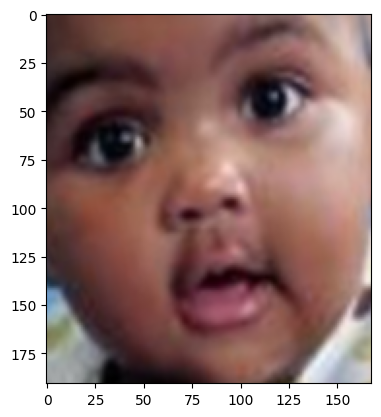

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
Augmentator = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), # flip
    layers.RandomRotation(0.1), # rotate
    layers.RandomZoom(0.2),  # zoom
    layers.RandomWidth(0.2), # width
    layers.RandomHeight(0.2), # height
], name="Augmentator")

# img = tf.expand_dims(img, 0) # Add batch dimension to image
augmented_img = Augmentator(img)
img_after_augment = tf.squeeze(augmented_img) # Remove batch dimension
type(img_after_augment)
plt.imshow(cv2.cvtColor(img_after_augment.numpy().astype("uint8"), cv2.COLOR_BGR2RGB))